>> ### Correlation between news and stock movement for NVDA

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/NVDA_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,1999-01-22 00:00:00+00:00,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN
1,1999-01-25 00:00:00+00:00,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,10.476398
2,1999-01-26 00:00:00+00:00,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,-7.759362
3,1999-01-27 00:00:00+00:00,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,-0.311031
4,1999-01-28 00:00:00+00:00,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,-0.314397
5,1999-01-29 00:00:00+00:00,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0,-4.701941
6,1999-02-01 00:00:00+00:00,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0,1.975591
7,1999-02-02 00:00:00+00:00,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0,-7.741858
8,1999-02-03 00:00:00+00:00,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0,2.097206
9,1999-02-04 00:00:00+00:00,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0,5.478561


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [13]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,0.28200,0.29000,0.27375,0.27550,0.252696,787024000,0.0,0.0,-3.587052
1,2009-04-29 00:00:00+00:00,0.000000,0.27750,0.27875,0.26875,0.27200,0.249486,859668000,0.0,0.0,-1.538458
2,2009-05-22 00:00:00+00:00,0.000000,0.24175,0.24900,0.23725,0.24550,0.225179,718260000,0.0,0.0,1.551188
3,2009-05-27 00:00:00+00:00,0.234091,0.25750,0.26700,0.25500,0.25925,0.237791,814152000,0.0,0.0,0.193234
4,2009-05-29 00:00:00+00:00,0.068182,0.26300,0.26350,0.25175,0.26075,0.239167,834232000,0.0,0.0,-0.761181
5,2009-06-01 00:00:00+00:00,0.000000,0.26375,0.27500,0.26275,0.27350,0.250861,1022764000,0.0,0.0,4.889741
6,2009-06-02 00:00:00+00:00,0.000000,0.27350,0.27950,0.26625,0.27125,0.248798,907984000,0.0,0.0,-0.822664
7,2009-06-05 00:00:00+00:00,0.083333,0.27725,0.27725,0.26750,0.27075,0.248339,559992000,0.0,0.0,-0.550968
8,2009-06-08 00:00:00+00:00,0.218182,0.26875,0.27300,0.26250,0.26925,0.246963,473948000,0.0,0.0,-0.554010
9,2009-06-09 00:00:00+00:00,0.000000,0.27300,0.28700,0.27100,0.28400,0.260492,725032000,0.0,0.0,5.478181


>> #### Correlation Analysis

In [14]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: -0.02, P-value: 0.2398


>> #### Visualization

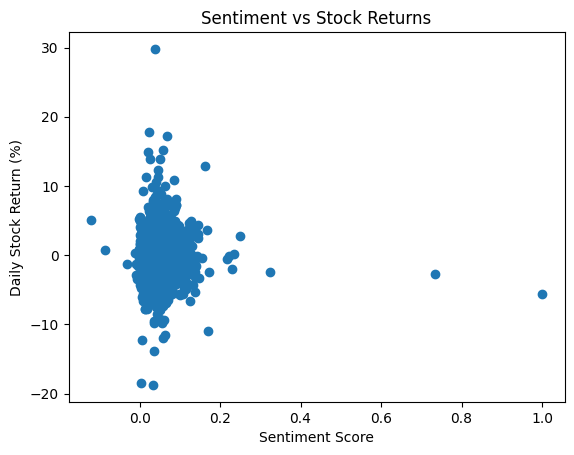

In [15]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)